In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python

/content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python


In [2]:
!pip install wquantiles

In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [5]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

#1.1 정형화된 데이터 요소
##용어정리
- 수치형 : 숫자를 이용해 표현할 수 있는 데이터
- 연속형 : 일정 범위 안에서 어떤 값이든 취할 수 있는 데이터
- 이산 : 정수값만 취할 수 있는 데이터
- 범주형 : 가능한 범주 안의 값만 취할 수 있는 데이터
- 이진 : 두개의 값만을 갖는 범주형 데이터의 특수한 경우
- 순서형 : 값들 사이에 분명한 순위가 있는 범주형 데이터

##주요개념
- 일반적으로 소프트웨어에서는 데이터를 종류별로 구분한다.
- 데이터 유형에는 수치형(연속, 이산)과 범주형(이진, 순서)가 있다.
- 소프트웨어에서 데이터 종류를 정하는 것은 해당 데이터를 어떻게 처리할지를 정하는 것과 같다.


#1.2 테이블 데이터
##주요개념
- 데이터 과학에서 기본이 되는 데이터 구조는 행과 열이 각각 레코드와 변수를 의미하는 테이블 모양의 행렬이다.
- 용어가 혼란스러울 수 있으니 주의하자. 데이터 과학에 관련된 서로 다른 학문들은 저마다 다양한 용어를 사용한다.

#1.3 위치 수정
##용어정리
- 평균(mean) :  모든 값의 총합을 개수로 나눈 값
- 가중 평균(weighted mean): 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값
- 중간값(median) : 데이터에서 가장 가운데 위치한 값
- 백분위수 : 전체 데이터의 P%를 아래에 두는 값
- 가중 중간값(weighted median) : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
- 절사평균(trimmed mean) : 정해진 개수의 극단값을 제외한 나머지 값들의 평균
- 로버스트 : 극단값들에 민감하지 않다
- 특잇값 : 대부분의 값과 매우 다른 데이터값

In [6]:
# 1.3.3 예제: 인구에 따른 살인 비율의 위치 추정
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [7]:
# 평균
state['Population'].mean()

6162876.3

In [8]:
# 절사 평균
trim_mean(state['Population'], 0.1)

4783697.125

In [9]:
# 중간값
state['Population'].median()

4436369.5

In [10]:
# 가중 평균
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [11]:
# 가중 중간값
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

#1.4 변이 추정
##용어정리
- 편차 : 관측값과 위치 추정값 사이의 차이
- 분산 : 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값
- 표준편차 : 분산의 제곱근
- 평균절대편차 : 평균과의 편차의 절댓값의 평균
- 중간값의 줄위절대편차(MAD, median absolute from the median) : 중간값과의 편차의 절댓값의 중간값
- 범위 : 데이터의 최댓값과 최솟값의 차이
- 순서통계량 : 최소에서 최대까지의 정렬된 데이터 값에 따른 계량형
- 백분위수 : 어떤 값들의 P%가 이 값 혹은 더 작은 값을 갖고, (100-P)%가 이 값 혹은 더 큰 값을 갖도록 하는 값
- 사분위범위 : 75번째 백분위수와 25번째 백순위수 사이의 차이

** 분산, 표준편차, 평균절대편차 모두 특잇값과 극단값에 로버스트하지 않다.

##주요 개념
- 분산과 표준편차는 가장 보편적으로 널리 사용되는 변이 측정 방법이다.
- 이들 모두 특잇값에 민감하다.
- 중간값과 백분위수로부터 평균절대편차와 중간값의 중위절대편차를 구하는 것이 좀 더 로버스트하다.

In [12]:
# 1.4.3 예제: 주별 인구의 변이 추정
# 표준편차
state['Population'].std()

6848235.347401142

In [13]:
# 사분위범위
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [14]:
# MAD
robust.scale.mad(state['Population'])

3849876.1459979336

#1.5 데이터 분포 탐색하기
##용어정리
- 상자그림 : 데이터 분포의 시각화하기 위한 간단한 방법
- 도수분포표 : 어떤 구간에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
- 히스토그램 : x축은 구간들을, y축은 빈도수를 나타내는 도수 테이블의 그림. 시각적으로 비슷하지만, 막대 그래프를 히스토그램과 혼동해서는 안된다.
- 밀도 그림 : 히스토그램을 부드러운 곡선으로 나타낸 그림. 커널밀도추청을 주로 사용한다.

In [15]:
# 백분위수 구하는 법 : 판다스의 quantile을 사용한다.
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

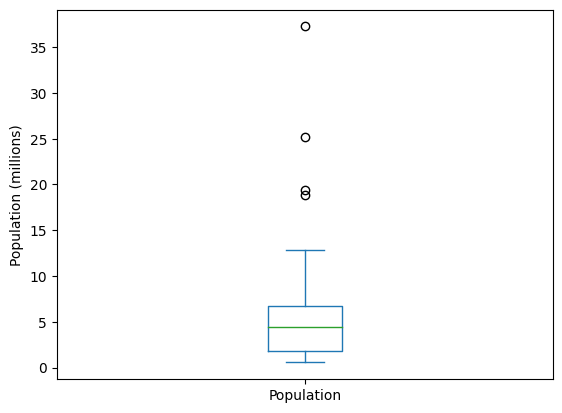

In [17]:
# boxplot
ax = (state['Population']/1e6).plot.box()
ax.set_ylabel('Population (millions)')

In [21]:
# 도수분포표
binnedPopulation = pd.cut(state['Population'], 10) #10개의 동일한 구간으로 나눈다.
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64
